# Study correlations in input variables 

load datasets

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
hd_ttH=pandas.read_hdf('../../Files/skimmed/ttH.h5', 'df')
hd_ttW=pandas.read_hdf('../../Files/skimmed/ttW.h5', 'df')
hd_ttbar=pandas.read_hdf('../../Files/skimmed/ttbar.h5', 'df')

In [3]:
hd_ttH.keys()

Index(['DEtall01', 'lep_flavour', 'max_eta', 'minDeltaR_LJ_0',
       'minDeltaR_LJ_1', 'Meff', 'DRlj00', 'min_DRl0b', 'min_DRlj_new',
       'DPhij0MET', 'lead_BjetPt', 'lead_jet_sumBEff', 'sublead_jet_sumBEff',
       'scale_nom', 'pileupEventWeight_090', 'MV2c10_70_EventWeight',
       'JVT_EventWeight', 'SherpaNJetWeight', 'EventNumber', 'RunYear',
       'MET_RefFinal_et', 'lep_Pt_0', 'lep_Eta_0', 'lep_Phi_0', 'lep_Pt_1',
       'lep_Eta_1', 'lep_Phi_1', 'total_charge', 'Mll01', 'Ptll01', 'DRll01',
       'nJets_OR_T', 'nJets_OR_T_MV2c10_70', 'HT_lep', 'HT_jets', 'lead_jetPt',
       'sublead_jetPt', 'lepSFTrigTight', 'lepSFObjTight', 'weightS'],
      dtype='object')

In [4]:
variablelist_all_idx=hd_ttH.keys()
variablelist_all=variablelist_all_idx.tolist()

In [5]:
list_to_del=['scale_nom', 'pileupEventWeight_090', 'MV2c10_70_EventWeight',
           'JVT_EventWeight', 'SherpaNJetWeight', 'EventNumber', 'RunYear',
             'lepSFTrigTight', 'lepSFObjTight', 'weightS']

In [6]:
for i in list_to_del:
    variablelist_all.remove(i)

In [7]:
len(variablelist_all)/4

7.5

In [8]:
with open("../VarList_def.json") as vardict:
    variablelist = json.load(vardict)[:]
    
#variablelist

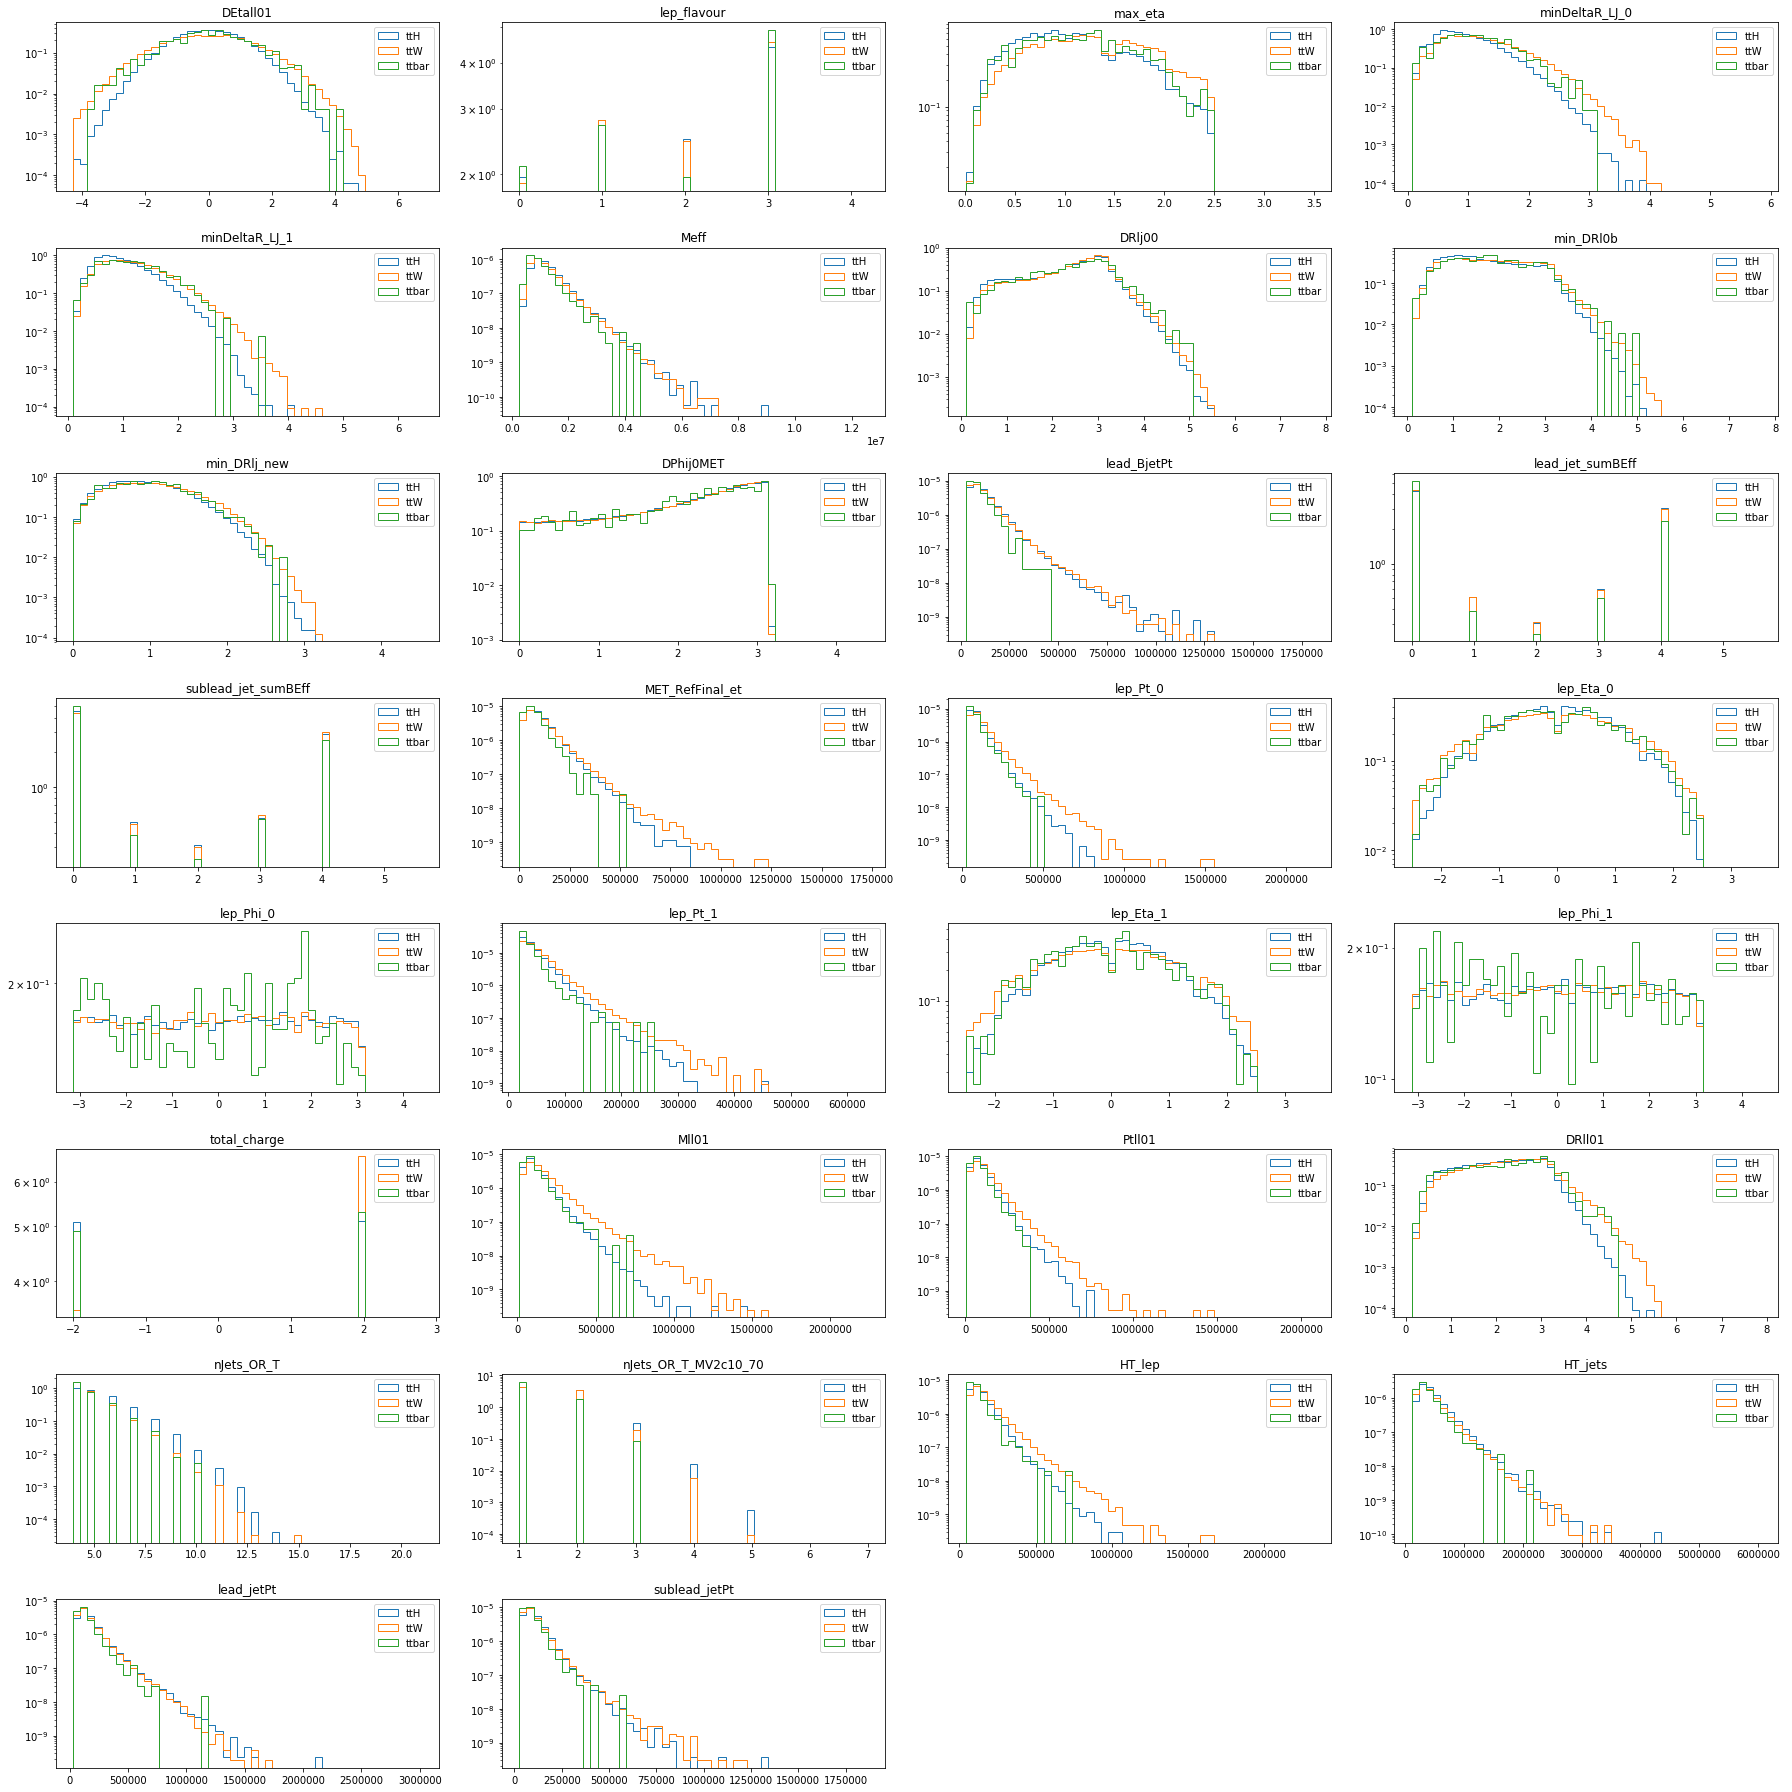

In [12]:
fig, ax = plt.subplots(8, 4, figsize=(25, 25))
nbins = 50
varlist=variablelist_all
varcounter = -1
for i, axobjlist in enumerate(ax):
      for j, axobj in enumerate(axobjlist):
        varcounter+=1
        if varcounter < len(varlist):
            var = varlist[varcounter]
            p_ttH = pandas.DataFrame({var: hd_ttH[var]})
            p_ttW = pandas.DataFrame({var: hd_ttW[var]})
            p_ttbar = pandas.DataFrame({var: hd_ttbar[var]})
           
            minval = np.amin(p_ttH[var])
            maxval = max([np.amax(p_ttH[var]), np.amax(p_ttW[var]), np.amax(p_ttbar[var])])*1.4
            binning = np.linspace(minval,maxval,nbins)

            axobj.hist(p_ttH[var],binning,histtype=u'step',label='ttH',density=1) # color='orange',
            axobj.hist(p_ttW[var],binning,histtype=u'step', label='ttW',density=1) 
            axobj.hist(p_ttbar[var],binning,histtype=u'step', label='ttbar',density=1) 
            axobj.legend()
            axobj.set_yscale('log',nonposy='clip')
            axobj.set_title(varlist[varcounter])

        else:
            axobj.axis('off')

plt.tight_layout()
plt.savefig("Plots/all_variables_3class.png", transparent=True)
plt.show()

build correlation matrix

In [10]:
hd_ttH_1=hd_ttH[variablelist_all]

In [11]:
correlations = hd_ttH_1.corr()

In [ ]:
correlations

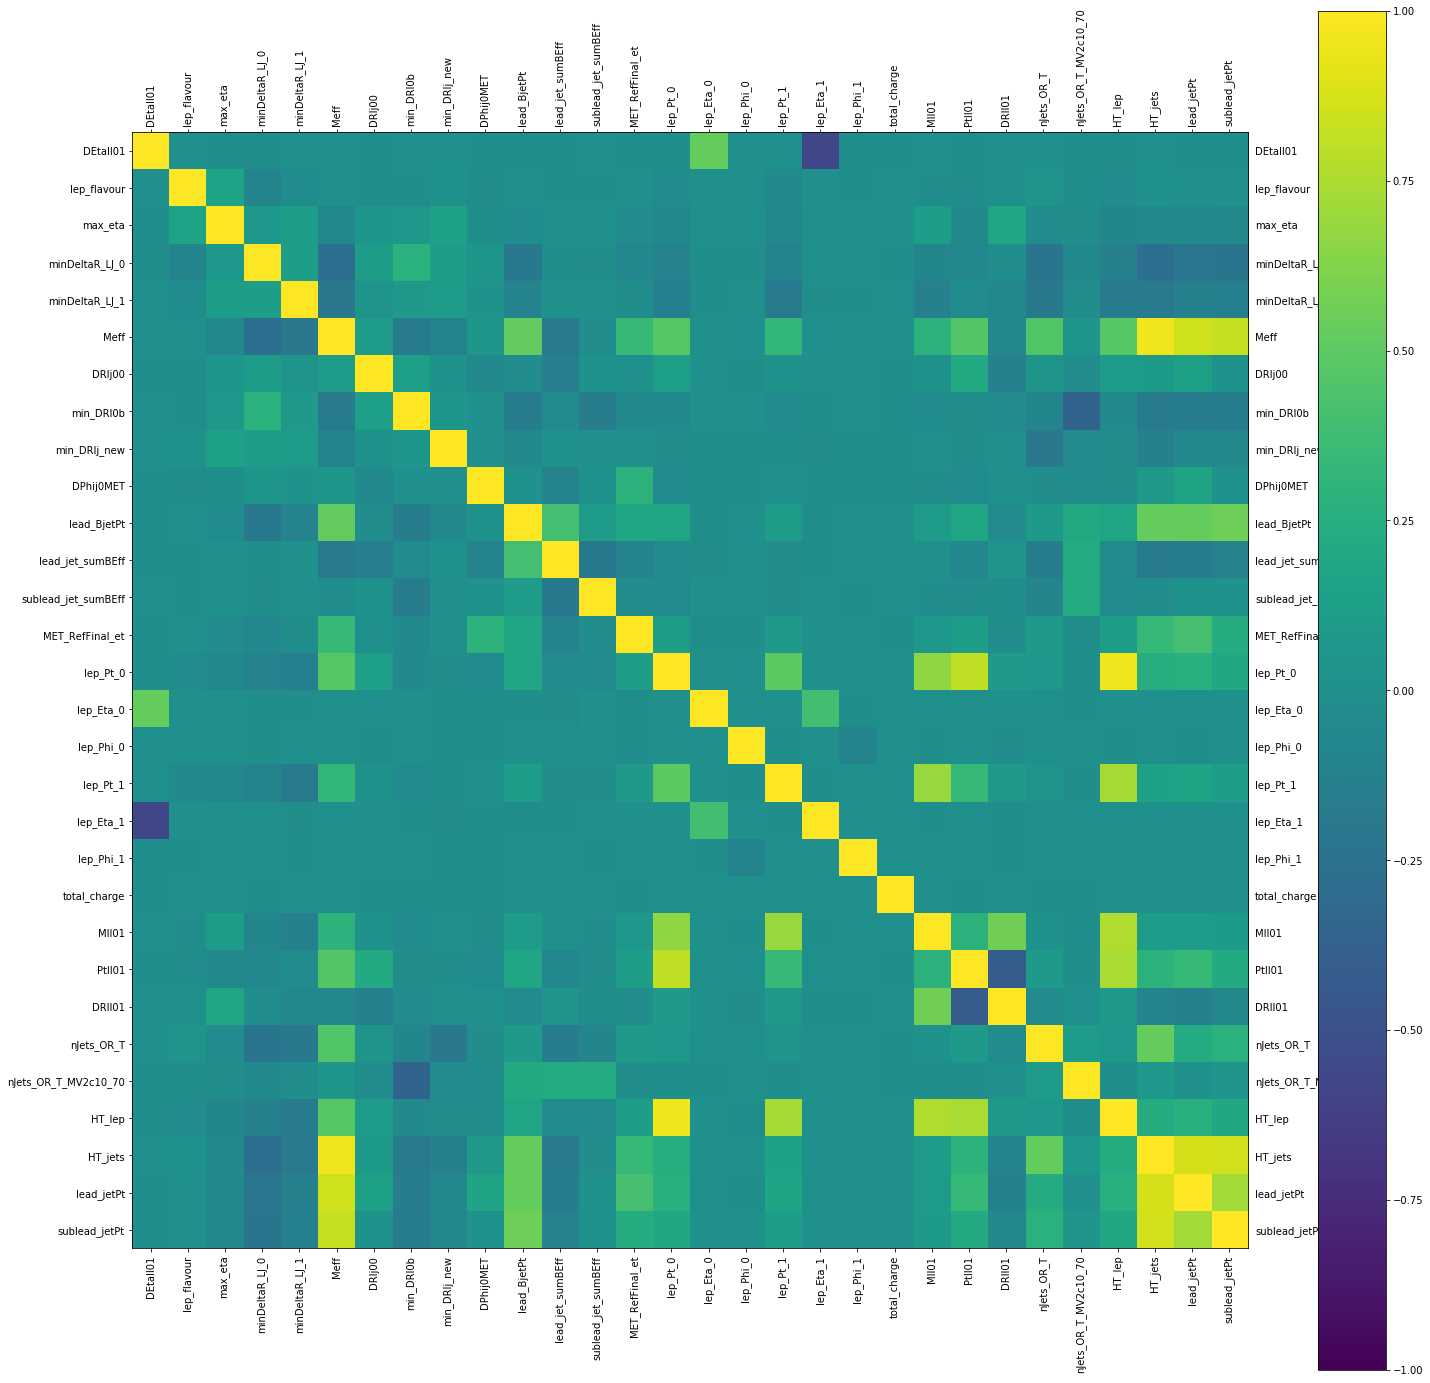

In [16]:
# plot correlation matrix
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(rotation=90)
ax.tick_params(labelbottom=True, labelright=True)
plt.xticks(rotation=90)
ticks = np.arange(0,len(variablelist_all),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(variablelist_all)
ax.set_yticklabels(variablelist_all)
plt.savefig("Plots/corr_all_variabls_tth.png", transparent=True)
plt.show()

In [17]:
limitNumberOfEvents=1000
hd_ttH_2=hd_ttH[variablelist].head(limitNumberOfEvents)

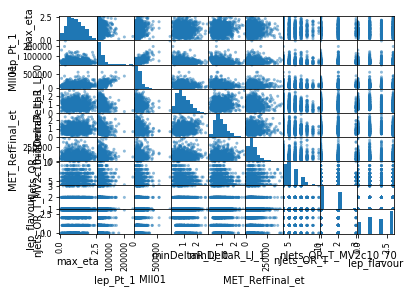

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(hd_ttH_2)
plt.show()

In [19]:
ttH_vars=hd_ttH[variablelist_all]
ttW_vars=hd_ttW[variablelist_all]
ttbar_vars=hd_ttbar[variablelist_all]